<a href="https://colab.research.google.com/github/susanavillar/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PFINAL_GRUPO_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **PRÁCTICA FINAL**


> GRUPO A08



>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas

# Índice

1. [Introducción](#introducción)

2. [Datos](#datos)

   2.1. [Pasos Previos](#pasos-previos)

   2.2. [Importación de la base](#importación)

   2.3. [Análisis y Formato](#análisis-y-formato)

   2.4. [Preprocesamiento de datos](#pre-procesamiento-de-datos)

3. [Métodos](#métodos)

   3.1. [Data Augmentation](#data-augmentation)

   3.2. [Arquitectura del modelo](#arquitectura-del-modelo)

   3.3 [Entrenamiento del modelo](#entrenamiento-del-modelo)

   3.4 [Modelo de Validación](#modelo-de-validación)

   3.5 [Modelo Final](#modelo-final)

   3.6 [Matriz de confusión](#matriz-de-confusión)

4. [Resultados](#métodos)

   4.1 [Análisis](#análisis)

   4.2 [Predicciones](#predicciones)

   4.3 [Interpretación de caracteres a mano](#interpretación-de-caracteres-a-mano)


5. [Trabajo a Futuro](#trabajo-a-futuro)

   5.1 [Ideas de implementaciones futuras](#ideas-de-implementaciones-futuras)

   5.2 [Ejemplo: Red de Clasificación binaria](#ejemplo-red-de-clasificacion-binaria)

      - 5.2.1 [Análisis y formato](#análisis-y-formato)

      - 5.2.2 [División de datos](#división-de-datos)

      - 5.2.3 [Modelo](#modelo)

      - 5.2.4 [Graficamos el proceso](#graficamos-el-proceso)

      - 5.2.5. [Modelo Final](#modelo-final)
      
6. [Bibliografía](#bibliografía)



> ## Introducción  

Hoy en día gracias al enorme avance digital, contamos con númerosas aplicaciones e interfaces que hacen que nuestro día a día sea más sencillo. Este progreso se extiende al reconocimiento de escrituras, lo que supone grandes ventajas en campos como la educación y la alfabetización.


Este proyecto se centra en la creación y optimización de un modelo de reconocimiento de dígitos manuscritos en el alfabeto árabe, utilizando para ello Redes Nueronales Convolucionaes (CNN).

El alfabeto árabe esta considerado como uno de los mas elegantes, pero es a su vez uno de los mas complejos, por lo que reconocer sus caracteres escritos a mano no deja de ser un gran desafío.

El objetivo de este sistema es proporcionar una herramienta eficaz y precisa para identificar y clasificar letras de dígitos manuscritos en árabe.

Aunque existen muchos proyecto dedicados al reconcimiento de dígitos a mano, gran parte de ellos se centran en números manuscritos, u otros alfabetos. Sin embargo, hemos decidido elegir este alfabeto ya que además de considerarse una de las manifestaciones más originales del arte islámico, es el alfabeto utilizado en la 6º lengua más hablada en el mundo.



Cabe mencionar un proyecto de investigación [María Nuñez M.A, Un mensaje en la botella: escritura árabe en contexto, Año: 2016, http://hdl.handle.net/10045/61454 ] en el que la identificación de las producciones cerámicas mediavales, pudo llevarse a cabo gracias a la comprensión de un texto en árabe sobre una botella de tipo visigótico.

 Así pues sería de gran utilidad, identificar dichos carácteres con nuestro modelo a pesar de que estos no se vieran correctamente, o pudiesen faltar algunas partes, gracias a la tolerancia a posbiles alteraciones en los datos de entrada, con la que cuenta las redes nueronales.








> ## Datos


El conjunto de datos que hemos utilizado en este proyecto es el "Arabic Handwritten Characters Dataset", obtenido de la reconocida plataforma Kaggle. Este conjunto de datos ofrece una colección diversa de caracteres escritos a mano en árabe, lo que lo hace relevante para nuestro objetivo de reconocimiento de dígitos manuscritos en el alfabeto árabe.

Tamaño del Conjunto de Datos:
El conjunto de datos contiene [16.800] imágenes de cracteres manuscritos, proporcionando un tamaño adecuado para entrenar y evaluar nuestro modelo de reconocimiento.

Fueron escritos por 60 participantes de entre 19 y 40 años, siendo diestros el 90% de ellos. Cada uno de ellos, escribieron 10 veces cada uno de los carácteres que conforman este alfabeto, obteniendo así un total de: 60 * 10 * 28 = 16.800 dígitos manuscritos con los que trabajar.

La elección del conjunto de datos se debe a su similitud con el objetivo del proyecto. Epecialmente hemos tenido en cuenta su gran tamaño, así como la cercanía de los datos, ya que fueron escritos por participantes voluntarios. Tambien hemos valorado la representatividad de todas las clases (letras del alfabeto), y la ausencia de datos repetidos, que de existir hubieramos tenido que procesar posteriormente.

El método de recopilación y recuperación de los datos, ha sido empleando nuestro API de kaggle. Así hemos podido descargar el conjunto de datos requerido desde Kaggle, utilizano el API proporcionado por la plataforma, en nuestro documento.

"Conjunto de datos de caracteres manuscritos árabes", 2017: https://www.kaggle.com/datasets/mloey1/ahcd1?select=Arabic+Handwritten+Characters+Dataset+CSV


> ### Pasos previos

En primer lugar llamamos a todas las librerías que serán necesarias para cargar y preparar la base de datos, graficar, crear el modelo de redes neuronales, etc.

In [2]:
# Librerías para la descarga del archivo
import zipfile
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import io

#Librerías keras
import tensorflow as tf
from tensorflow import keras

#Librerías para el desarrollo de la CNN
import keras
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator



#Librerías para graficar
import matplotlib.pyplot as plt
import numpy as np

# Prepraracion de etiquetas
from keras import utils
from keras.utils import to_categorical

# Librerías para importar hiperparametros
from keras.optimizers import SGD

> ### Importación

Para ello hemos creado un diccionario con el usario y el API kaggle, que nos permite acceder a cualquier base de datos de esta plataforma. También llevamos a cabo algunos pasos necesarios para la seguridad y permisos de lectura y escritura. Finalmente abrimos la base de datos en modo escritura

In [3]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d mloey1/ahcd1

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ahcd1.zip: Skipping, found more recently modified local copy (use --force to force download)


Una vez hecho esto, debemos abrir el archivo zip en modo lectura, mostrando por pantalla cada elemento que lo forma:

In [4]:
import zipfile

archivo_zip = '/content/ahcd1.zip'

#with zipfile.ZipFile(archivo_zip,'r') as zip_file:
#  for nombre_archivo in zip_file.namelist():
#     print(nombre_archivo)

Extraemos los datos de un archivo ZIP, que contiene conjuntos de imágenes y etiquetas almacenados en formatos CSV. Las imágenes, originalmente presentadas en vectores de píxeles en los CSV, las convertimos en matrices numéricas, facilitando así su procesamiento por nuestros modelos de aprendizaje automático. Paralelamente, las etiquetas asociadas con estas imágenes también las trasformamos de su formato CSV original a vectores numéricos. Como esta base de datos ya venía dividida en datos de entrenamiento y test, este proceso fue repetido con cada conjunto de datos.

In [5]:
# Descomprimimos el archivo ZIP
archivo_zip = '/content/ahcd1.zip'
extract_to_path = '/content/dataset'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Cargamos los datos de entrenamiento y prueba
csv_train_images_path = '/content/dataset/csvTrainImages 13440x1024.csv'
csv_train_labels_path = '/content/dataset/csvTrainLabel 13440x1.csv'
csv_test_images_path = '/content/dataset/csvTestImages 3360x1024.csv'
csv_test_labels_path = '/content/dataset/csvTestLabel 3360x1.csv'

train_images = pd.read_csv(csv_train_images_path, header=None).to_numpy()
train_labels = pd.read_csv(csv_train_labels_path, header=None).to_numpy() - 1
test_images = pd.read_csv(csv_test_images_path, header=None).to_numpy()
test_labels = pd.read_csv(csv_test_labels_path, header=None).to_numpy() - 1


> ### Análisis y formato

**TAMAÑO**

Hemos cargado nuestros datos divididos en cutro tensores, visualiamos sus tamaños, y el número total de datos:

In [6]:
print("Forma imágenes =", train_images.shape, "Forma etiquetas =", train_labels.shape)

# Cambiamos el formato de nuestras imágenes, para convertirlas en matrices de 32 * 32
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)


# Comprobamos la nueva forma del tensor que guarda las imagenes:
print("Nueva Forma imágenes =", train_images.shape, "Nueva Forma etiquetas =", train_labels.shape)


# Tamaño de los tensores:
print("Número de imágenes de entrenamiento =", len(train_images))
print("Número de imágenes de test =", len(test_images))
print("Número de imágenes totales =", len(train_images) + len(test_images))



Forma imágenes = (13440, 1024) Forma etiquetas = (13440, 1)
Nueva Forma imágenes = (13440, 32, 32, 1) Nueva Forma etiquetas = (13440, 1)
Número de imágenes de entrenamiento = 13440
Número de imágenes de test = 3360
Número de imágenes totales = 16800


Para entender un poco mejor nuestra base de datos, estudiaremos en algunos puntos tanto de las imágenes como de las etiquetas.

También visualizaremos por pantalla algunas de las imágenes que conforman el conjunto de entrenamiento.


Previamente guardamos los nombres de cada letra del alfabeto árabe, que corresponderán a las 28 clases en las que se clasifican nuestras imágenes.

In [7]:
# Creamos una lista de clases con los siguientes elementos
clases = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
          'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
          'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

# Mostramos longitud de la lista de clases
print("Longitud de la lista de clases:", len(clases))

# Mostramos el valor máximo en 'train_labels'
print("Valor máximo en train_labels:", max(train_labels))

# Mostramos el segundo elemento de 'train_labels'
print("Segundo elemento de train_labels:", train_labels[1])


Longitud de la lista de clases: 28
Valor máximo en train_labels: [27]
Segundo elemento de train_labels: [0]


In [8]:
# Imprimimos la forma del sexto elemento en 'train_images'
print("Forma de la sexta imagen de entrenamiento:", train_images[5].shape)

# Imprimimos el primer elemento de 'test_labels'
print("Primera etiqueta de test:", test_labels[0])

# Imprimimos la forma de 'test_labels'
print("Forma de test_labels:", test_labels.shape)

# Calculamos e imprimimos el valor máximo en 'train_images'
max_value = np.max(train_images)
print("Valor máximo en train_images:", max_value)


Forma de la sexta imagen de entrenamiento: (32, 32, 1)
Primera etiqueta de test: [0]
Forma de test_labels: (3360, 1)
Valor máximo en train_images: 255


Representación gráfica de las 5 primeras imágenes del conjunto de entrenamiento:

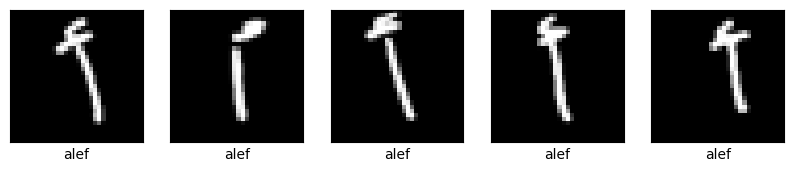

In [9]:
num_images = 5
plt.figure(figsize=(10,10))

# Representamos las imágenes, con su etiqueta
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(32,32).T,"gray")
    plt.xlabel(clases[int(train_labels[i][0])])
plt.show()

Verificamos tambien que todas las clases (28 letras del alfabeto) tiene una número similar de muestras, y no hay diferencias significativas que pudieran suponer problemas en el entrenamiento y precisión del modelo:

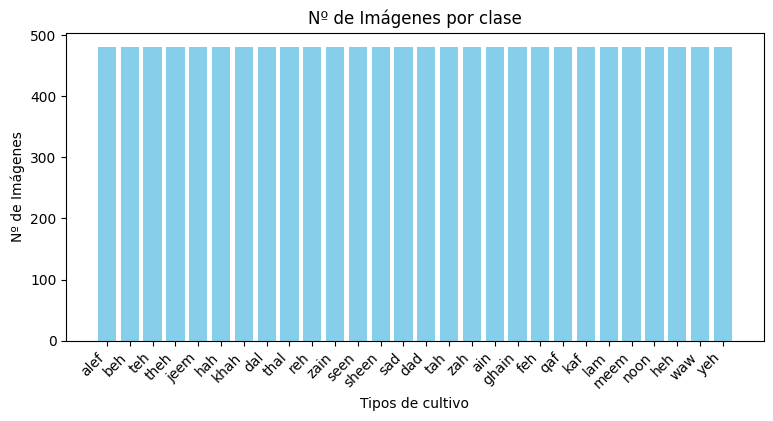

Número de imágenes por etiqueta:
[480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480 480
 480 480 480 480 480 480 480 480 480 480]


In [10]:
# Contamos el número de etiquetas que hay de cada clase
unique_labels, counts = np.unique(train_labels, return_counts=True)

etiquetas = []

for i in range(28):
  etiquetas.append(clases[unique_labels[i]])

# Mostramos el número de datos de cada clase, en un gráfico de barras
plt.figure(figsize=(9, 4))
plt.bar(etiquetas, counts, color='skyblue')
plt.xlabel('Tipos de cultivo')
plt.ylabel('Nº de Imágenes')
plt.title('Nº de Imágenes por clase')
plt.xticks(rotation=45, ha='right')  # Giramos las etiquetas, para poder visualizarlas mejor
plt.show()

# Mostramos el vector que guarda el número de imágenes por cada etiqueta:
print('Número de imágenes por etiqueta:')
print(counts)

En este primer vistazo, hemos podido observar que algunas imágenes estan **agrupadas por clases**, de forma que aparecen varias imágenes de la misma clase, de forma seguida. Es por ello que utrilizaremos shuffle y las desordenaremos por completo.

También hemos observado que los valores de los píxeles **no están normalizados**, por lo que una buena practica durante el preprocesamiento, será normalizarlos, manteniendo un rango de valores entre [0,1]

> ### Preprocesamiento de los datos

En este punto, llevaremos a cabo algunas modificaciones en los datos, que ayudarán y favorecerán la convergencia del modelo, así como una mejor precisión del mismo.

Pasamos las etiquetas a variables numéricas

In [11]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(train_labels) # Transformamos las etiquetas  a números
# encoded_labels = label_encoder.fit_transform(test_labels) # Transformamos las etiquetas  a números


En primer lugar, normalizamos los valores de los píxeles, dividiendolos simplemente entre 255, y obteniendo valores pertenencientes al rango [0,1]

In [12]:
print(np.max(train_images)) # Verificamos el valor máximo en 255

# Normalizamos los valores de los pixeles.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(np.max(train_images)) # Comprobamos el nuevo valor máximo

255
1.0


**SHUFFLE**

El siguiente paso será mezclar nuestros datos.

Como vimos en el primer análisis, las imágenes estan ordenadas por clases, por lo que las mezclaremos de forma que todos los datos aparezcan desordenados. A este proceso se le llama shuffle

In [13]:
# Verificamos que el vector de imagenes y etiquetas siguen teniendo la misma longitud
assert len(train_images) == len(train_labels), "Los vectores deben tener la misma longitud"

permutation = np.arange(len(train_images)) # Creamos un vector de la misma longitud

np.random.shuffle(permutation) # Lo llenamos de indices aleatorios

# Guardamos las imágenes y etiquetas con el nuevo orden obtenido
train_images = train_images[permutation]
train_labels = train_labels[permutation]

Volvemos a mostrar por pantalla las 5 primeras imágenes de entrenamiento, y podremos verificar que ya no pertencen a la misma clase, sino que estan desordenads, y perteneceran a cualquiera de las 28 clases existentes:

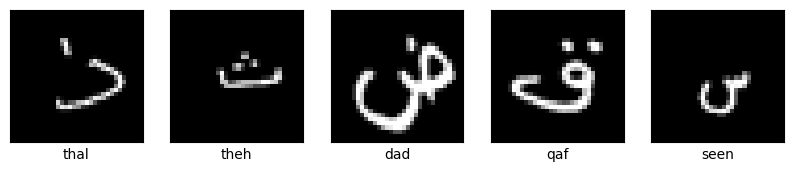

In [14]:
random_indices = np.random.randint(0, train_images.shape[0], size=25)

num_images = 5
plt.figure(figsize=(10,10))

# Representamos las imágenes, con su etiqueta
for i in range(num_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape(32,32).T,"gray")
    plt.xlabel(clases[int(train_labels[i][0])])
plt.show()

Para la preparación de nuestros datos, debemos también convertir las etiquetas a categóricas:

In [15]:
# from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])
print(train_labels[0].shape)



[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
(28,)


Como último paso antes de empezar el desarrollo del modelo de redes neuronales convolucionales, dividiremos de nuevo los datos, en entrenamiento y validación, lo que nos permitirá validar nuestro modelo, y elegir los hiperparámetros más adecuados:

El siguiente paso será dividir nuestros datos, en :

* Imágenes de entrenamiento: `tr_images`
* Etiquetas de las imagénes de entrenamiento: `tr_labels`
* Imágenes de test: `valid_images`
* Etiquetas de las imágenes de test: `valid_labels`

In [16]:
from sklearn.model_selection import train_test_split

tr_images, valid_images, tr_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.125, random_state=42)

# Imprime las longitudes de los conjuntos resultantes
print(len(tr_images))
print(len(valid_images))

11760
1680


> # Métodos



> ### Data Augmentation

**Data Augmentation** es una técnica clave en el entrenamiento de redes neuronales, utilizada para aumentar artificialmente la variabilidad en los datos de entrenamiento. Mediante transformaciones como rotaciones, cambios de escala (zoom), y desplazamientos, se genera un conjunto de datos más amplio y diverso. Esto es crucial para mejorar la generalización del modelo y prevenir el sobreajuste, especialmente cuando se dispone de un número limitado de imágenes de entrenamiento.

En nuestra implementación, aplicamos Data Augmentation para enseñar al modelo a reconocer patrones en distintas condiciones. Las transformaciones específicas incluyen rotación, zoom, desplazamientos y giros. Esta variedad ayuda al modelo a adaptarse mejor a diferentes orientaciones y tamaños de los objetos en las imágenes.

**VISUALIZACIÓN DE DATA AUGMENTATION**

Para ilustrar el efecto del Data Augmentation, mostramos un conjunto de imágenes originales y sus versiones transformadas. Esta visualización nos permite comprender cómo cada transformación altera las imágenes, preparando al modelo para un espectro más amplio de variaciones en los datos reales.

Es importante señalar que las transformaciones mostradas son ejemplos ilustrativos. En el entrenamiento definitivo, hemos empleado parámetros de Data Augmentation ajustados específicamente para nuestro conjunto de datos y objetivos de modelo.

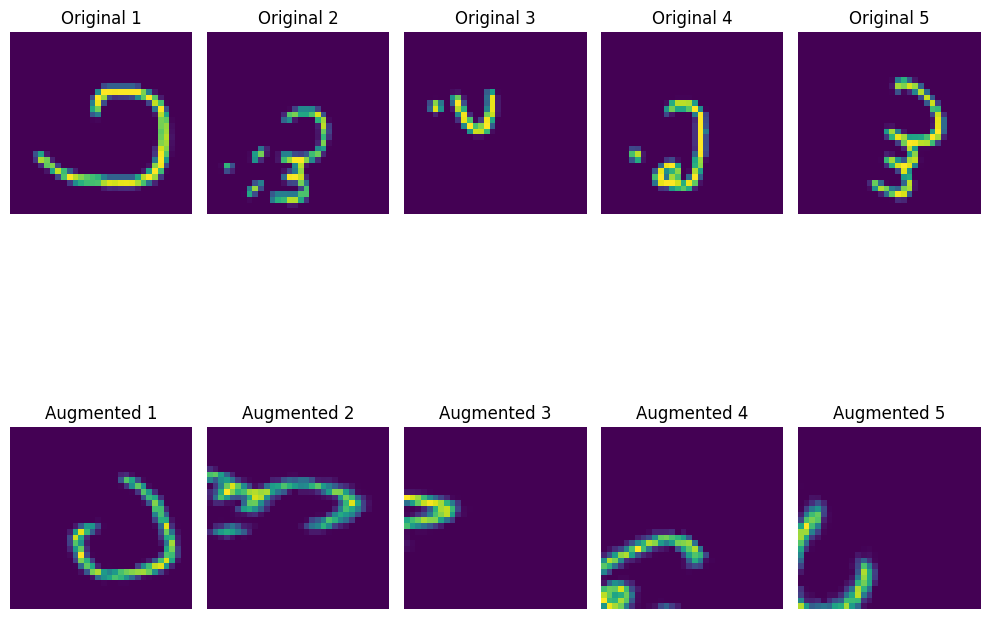

In [17]:
import keras
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Configuración del generador de imágenes para visualización
datagen_visualization = ImageDataGenerator(
    rotation_range=90,  # Rotaciones de hasta 90 grados
    zoom_range=0.5,     # Permite que las imágenes se escalen mucho
    width_shift_range=0.3,  # Desplazamientos laterales grandes
    height_shift_range=0.3,  # Desplazamientos verticales grandes
    horizontal_flip=True,    # Permite volteo horizontal
    vertical_flip=True       # Permite volteo vertical
)

num_images_to_show = 5  # Número de imágenes a mostrar
indices_to_show = np.random.choice(len(tr_images), num_images_to_show, replace=False)

# Configuración del tamaño de la figura para una mejor visualización
plt.figure(figsize=(10, 2 * num_images_to_show))  # Ajusta el tamaño según sea necesario

# Generación y visualización de las imágenes aumentadas
for i, idx in enumerate(indices_to_show):
    it = datagen_visualization.flow(tr_images[idx:idx+1], batch_size=1)

    # Mostrar imagen original
    plt.subplot(2, num_images_to_show, i + 1)
    plt.imshow(tr_images[idx].squeeze())  # Quita cmap='gray' para mostrar colores
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Mostrar imagen aumentada
    augmented_image = it.next()[0]
    plt.subplot(2, num_images_to_show, num_images_to_show + i + 1)
    plt.imshow(augmented_image.squeeze())  # Quita cmap='gray' para mostrar colores
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

> ### Arquitectura del modelo

Hemos escogido esta arquitectura de red neuronal convolucional (CNN) porque es eficaz para el procesamiento de imágenes. Las capas convolucionales (Conv2D) se utilizan para extraer características relevantes de las imágenes, como bordes y patrones. Elegimos 3 capas convolucionales porque ofrecen un equilibrio entre eficiencia computacional y capacidad para extraer características complejas. Las primeras capas convolucionales aprenden patrones simples, y las capas subsiguientes aprenden patrones más complejos. Esta profundidad es particularmente útil dado el tamaño y la complejidad de nuestro conjunto de datos de imágenes árabes. Incluimos (MaxPooling2D) para reducir la dimensionalidad de las características extraídas y aprender representaciones más abstractas de las imágenes. La normalización por lotes (BatchNormalization) se utiliza para estabilizar y acelerar el entrenamiento.

Luego, hemos añadido capas completamente conectadas (Dense) para realizar la clasificación final. Estas capas toman las características extraídas y las utilizan para predecir las clases de las imágenes. Incorporamos Dropout con una tasa de 0.5 para reducir la dependencia entre neuronas, lo que ayuda a prevenir el sobreajuste. La normalización por lotes estabiliza el aprendizaje al normalizar las entradas de cada capa, lo que permite usar tasas de aprendizaje más altas y acelera el entrenamiento.

Seleccionamos ReLU debido a su eficiencia y efectividad en la introducción de no linealidades, reduciendo el problema del desvanecimiento del gradiente. La activación softmax es ideal para la clasificación multiclase ya que proporciona una distribución de probabilidad entre múltiples clases. La entropía cruzada categórica es adecuada para este tipo de problemas ya que mide el rendimiento de un modelo cuyas salidas son probabilidades entre varias clases.



> ### Entrenamiento del modelo



Dividimos el conjunto de datos en un 70% para entrenamiento, un 15% para validación y un 15% para pruebas. Esta división fue escogida para proporcionar una cantidad suficiente de datos para el aprendizaje y al mismo tiempo permitir una evaluación efectiva del rendimiento del modelo.

Implementamos el aumento de datos para mejorar la diversidad de nuestro conjunto de entrenamiento, lo que hace que nuestro modelo sea más robusto frente a variaciones en nuevas imágenes. El 'Early Stopping' se configuró para detener el entrenamiento si la precisión en el conjunto de validación no mejoraba después de 10 épocas, asegurando así que obteníamos el mejor modelo posible sin caer en sobreajuste.

> ### Modelo de Validación

In [18]:
# Preparamos el generador de imágenes para el aumento de datos
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(tr_images)



model = Sequential()
model.add(Conv2D(32,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(28, activation = 'softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=8, restore_best_weights=True)


# Entrenamiento del modelo
history = model.fit(
    datagen.flow(tr_images, tr_labels, batch_size=32),
    steps_per_epoch=len(tr_images) // 32,
    epochs=10,
    validation_data=(valid_images, valid_labels),
    callbacks=[ early_stopping],
    verbose=1
)


# Evaluación del modelo
test_loss, test_acc = model.evaluate(valid_images, valid_labels)
print("Test accuracy: ", test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        5

Representamos graficamente los resultados obtenidos en términos de precisión y pérdida a lo largo de las épocas seleccionadas. Lo que haremos será colocar en la misma gráfica los valores en entrenamiento y en test, de forma que esto nos ayude a evaluar el sobreajuste que se esta produciendo.

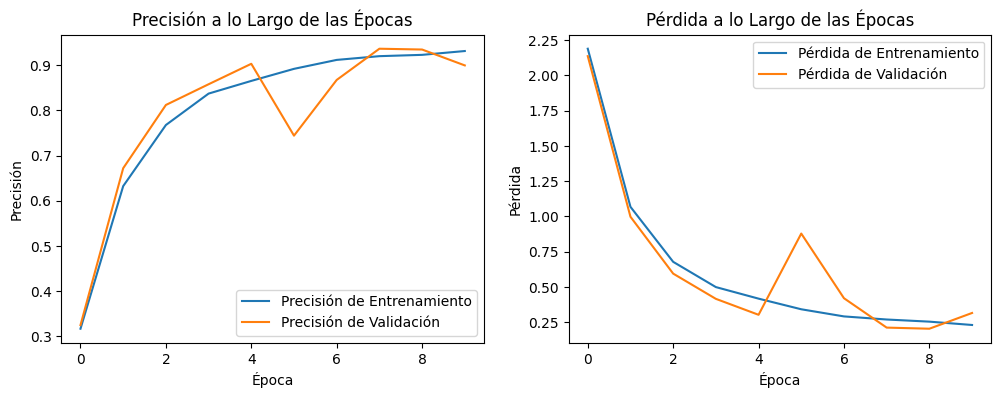

In [19]:
import matplotlib.pyplot as plt

# Precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión a lo Largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida a lo Largo de las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


**ELECCIÓN DE ÉPOCAS**

Tras analizar las gráficas de precisión y pérdida generadas durante las 10 épocas de entrenamiento, se observa un crecimiento en el rendimiento del modelo. La similitud entre las curvas de precisión de entrenamiento y validación sugiere que el modelo no está experimentando sobreentrenamiento significativo hasta el momento.

> ## Modelo final

In [20]:
# Preparamos el generador de imágenes para aumentar los datos de entrenamiento
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(train_images)

model = Sequential()
model.add(Conv2D(32,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(32, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,input_shape = (32,32,1), kernel_size = (5, 5), padding="same", activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(Conv2D(64, kernel_size = (5, 5),activation="relu",))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(28, activation = 'softmax'))

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# Entrenamiento del modelo
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    epochs=8
)

# Evaluación del modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)       

In [21]:
# Realizamos las predicciones sobre los datos de test
predicciones = model.predict(test_images)


105/105 [==============================] - 0s 3ms/step


In [22]:
# Obtenemos las etiquetas de clase de las predicciones
predicciones_etiquetas = np.argmax(predicciones, axis=1)

# Comparamos con las etiquetas reales
etiquetas_reales = np.argmax(test_labels, axis=1)
from sklearn.metrics import classification_report

# Mostramos las métricas de clasificación
print(classification_report(etiquetas_reales, predicciones_etiquetas))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.99      0.99      0.99       120
           2       0.85      0.98      0.91       120
           3       0.96      0.86      0.91       120
           4       0.92      0.99      0.96       120
           5       0.96      0.90      0.93       120
           6       0.96      0.97      0.96       120
           7       0.96      0.91      0.94       120
           8       0.96      0.86      0.91       120
           9       0.90      0.99      0.94       120
          10       0.95      0.89      0.92       120
          11       0.97      0.92      0.94       120
          12       0.98      0.99      0.98       120
          13       0.86      1.00      0.92       120
          14       1.00      0.95      0.97       120
          15       0.94      0.99      0.97       120
          16       0.96      0.93      0.94       120
          17       0.98    

> ## Matriz de confusión

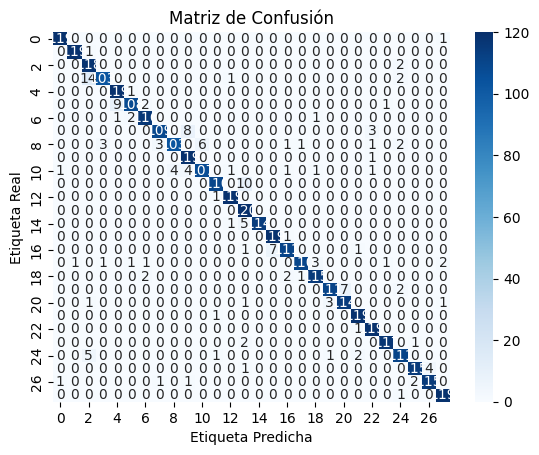

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones_etiquetas)

# Dibujar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


**ANÁLISIS DE LA MATRIZ DE CONFUSIÓN**

La evaluación detallada del modelo revela un rendimiento general muy bueno, con una precisión global del 93% en el conjunto de prueba. Al examinar la matriz de confusión, tambien se identifican áreas de fortaleza representadas en la diagonal principal, indicando una buena capacidad de clasificación en varias clases específicas.

Sin embargo, algunos desafíos notables surgen al analizar ciertas clases. Por ejemplo, las clases 2, 5, 17 presentan puntuaciones de recall más bajas, sugiriendo dificultades en la identificación de muestras positivas para estas categorías. Esto podría deberse a similitudes visuales o características compartidas entre estas clases.


> # Hallazgos





Una vez evaluado el modelo, y realizadas las predicciones con los datos de test, podemos llevar a cabo un análisis de los resultados obtenidos.

En cuánto a la precisión, con este modelo se ha conseguido una precisión de entorno a un 90 % por ciento en datos que la red no ha visto nunca, por lo que podemos entenderla como una precisión considerablemente alta.

Además es importante mencionar que tal y como se busca habitualmente en los algoritmos de machine learning, se ha conseguido alcanzar un equilibrio entre la optimización del modelo, y la generalización, favoreciendo a que el modelo de muy buenos resultados, con datos que no ha visto nunca.

Por último, debemos mencionar que también se ha considerado no elevar de forma excesiva el tiempo de ejecución del modelo, así como enocontrar un costo computacional adecuado. Al buscar un equilibrio entre optimización y eficiencia, hemos logrado manetener un tiempo de ejecución razonable, sin sacrificar demasido la precisión del modelo.



> ### Predicciones

Para entender mejor estos buenos resultados del modelo, veremos a continuación algunas imágenes junto con sus etiquetas reales, así como las etiquetas que devuelve el modelo. Además, veremos también el porcentaje con el que el modelo predice que dicha clase es la etiqueta real de la imagen correspondiente:

Mostramos y analizamos las predicciones que hace nuestro modelo para 10 de las imágenes de test o evaluación:


------------------------------------------------------------

--> Imagen 74


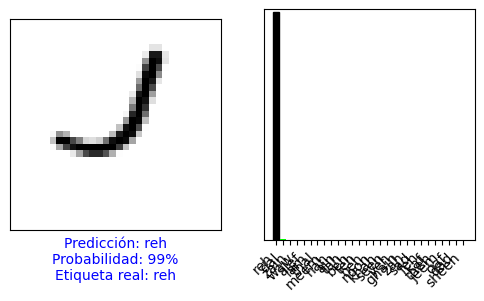







--> Imagen 32


<Figure size 640x480 with 0 Axes>

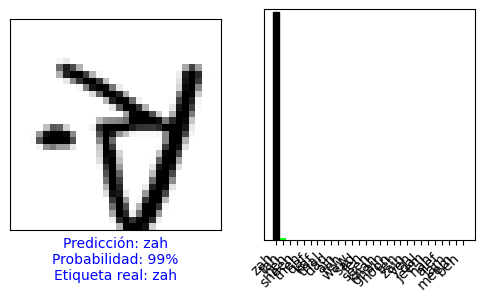







--> Imagen 25


<Figure size 640x480 with 0 Axes>

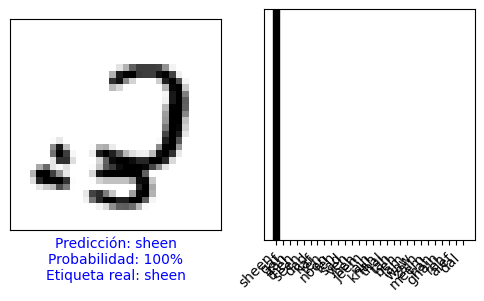







--> Imagen 95


<Figure size 640x480 with 0 Axes>

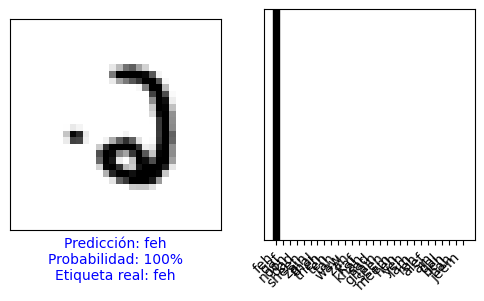







--> Imagen 11


<Figure size 640x480 with 0 Axes>

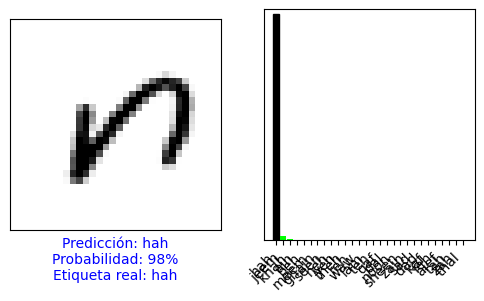







--> Imagen 72


<Figure size 640x480 with 0 Axes>

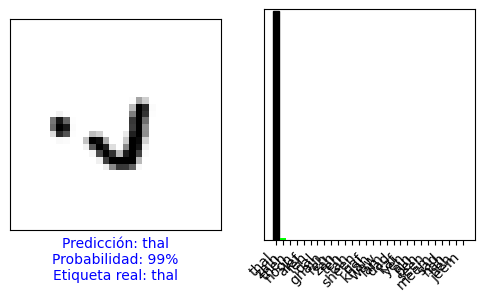







--> Imagen 21


<Figure size 640x480 with 0 Axes>

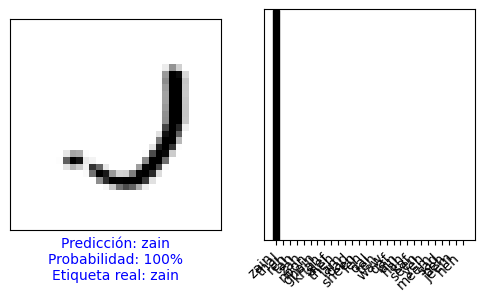







--> Imagen 88


<Figure size 640x480 with 0 Axes>

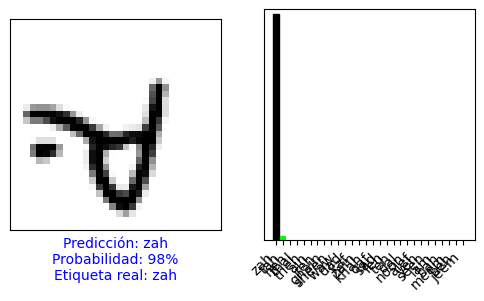







--> Imagen 93


<Figure size 640x480 with 0 Axes>

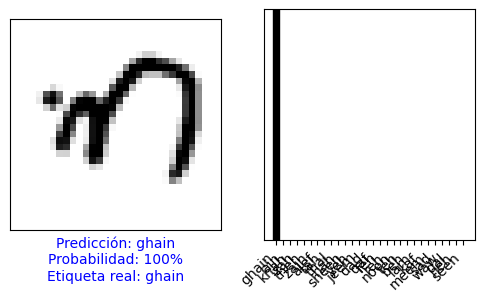







--> Imagen 19


<Figure size 640x480 with 0 Axes>

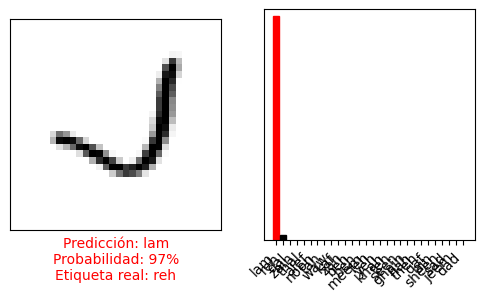

<Figure size 640x480 with 0 Axes>

In [24]:
# FUNCIONES PARA GRAFICAR PREDICCIONES
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicción: {}\nProbabilidad: {:2.0f}%\nEtiqueta real: {}".format(clases[predicted_label],
                                          100 * predictions_array[predicted_label],
                                          clases[true_label]),
                                          color=color)


def plot_value_array(i, predictions_array,true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    top_indices = np.argsort(predictions_array)[-28:][::-1]
    class_labels = [clases[idx] for idx in top_indices]
    plt.xticks(range(28), class_labels, rotation=45, ha='right')  # Ajusta el rango y las etiquetas
    plt.yticks([])
    thisplot = plt.bar(range(28), predictions_array[top_indices], color="#00FF00")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[0].set_color('red')  # Destacamos la mayor probabilidad
    thisplot[np.argmax(true_label[top_indices])].set_color('black')


random_indices = np.random.choice(100, size=10, replace=False)

print('\n' + '-'*60 + '\n')
for i in (random_indices):

  print (f"--> Imagen {i}")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones[i],  test_labels)
  plt.show()
  plt.clf()
  print('\n''\n')
  print('\n''\n')

**RESULTADOS**

De esta forma, hemos conseguido que nuestro modelo devuelva el nombre de la letra del alfabeto árabe correspondiente al dígito manuscrito que deseemos, con una alta probabilida de acierto.

Aunque los resultado son más altos de lo que podríamos esperar al principio del proyecto, consideramos que son adecuados para este problema, ya que los errores que comete son escasos, y la penalización que esto supone en una posible aplicación de la vida real, no sería demasiado grave por regla general (aunque depende de la aplicación), por lo que probablemente no sería conveniente sacrificar el tiempo de ejecución o el costo computacional, por una mayor precisión.


Tratando de analizar la precisión de nuestros modelos, hemos investigado sobre otros modelo, en los que se ha implementado este mismo problema, y utilizado esta misma base de datos o similares. Hemos recogido sus precisiones, y el número de parámetros totales de sus modelos, con la intención de graficar una comparativa entre sus precisiones y número de parámetros:

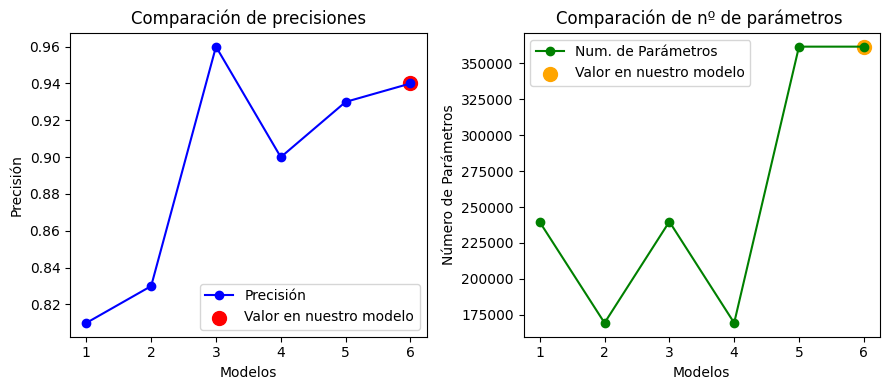

In [25]:
# Valores recogidos de precisión y nº de parámetros
precisiones = [0.81, 0.83, 0.96, 0.9, 0.93]
num_parametros = [239580, 169308, 239837, 169308, 361692]

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# GRAFICO DE PRECISION
axs[0].plot(range(1, len(precisiones) + 2), precisiones + [0.94], color='blue', marker='o', label='Precisión')
axs[0].scatter([len(precisiones) + 1], [0.94], color='red', marker='o', label='Valor en nuestro modelo', s=100)
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Precisión')
axs[0].set_title('Comparación de precisiones')
axs[0].legend()

# GRÁFICO DEL NÚMERO DE PARÁMETROS
axs[1].plot(range(1, len(num_parametros) + 2), num_parametros + [361692], color='green', marker='o', label='Num. de Parámetros')
axs[1].scatter([len(num_parametros) + 1], [361692], color='orange', marker='o', label='Valor en nuestro modelo', s=100)
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Número de Parámetros')
axs[1].set_title('Comparación de nº de parámetros ')
axs[1].legend()

plt.tight_layout()
plt.show()



> ### Interpretación de caracteres a mano
Además, hemos querido poner a prueba el modelo, evaluando como predice la letra del alfabeto árabe correspondiente a un dígito manuscritos por nosotras mismas. Para ello, lo hemos escrito y hemos cargado la imagen, obteniendo lo siguiente:

In [26]:
!pip install opencv-python

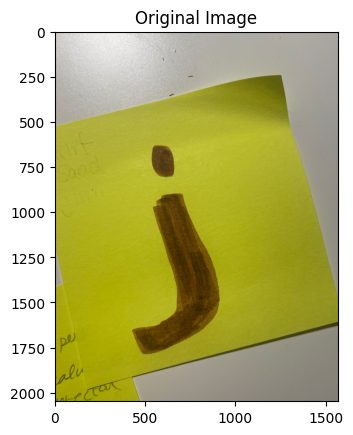

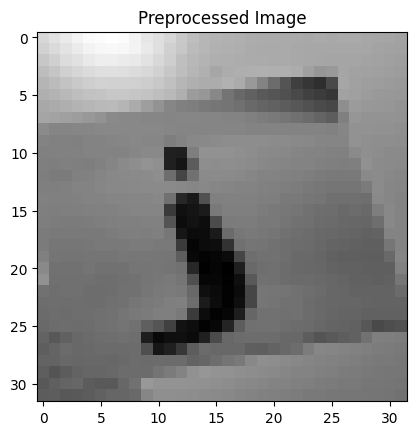

1/1 [==============================] - 0s 481ms/step
Predicción: dal


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

ultima_prediccion = None

def preprocess_image(image_path):
    # Descargamos la imagen desde la URL
    response = requests.get(image_path)
    img = Image.open(BytesIO(response.content))

    # Convertimos la imagen PIL a una matriz NumPy y la mostramos
    image = np.array(img)
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()

    # Convertir a escala de grises si no lo está
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mejoramos la segmentación con umbralización Otsu después de un ligero desenfoque
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operaciones morfológicas para mejorar la estructura del carácter
    kernel = np.ones((3, 3), np.uint8)
    morph_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Aplicamos un umbral adaptativo para binarizar la imagen
    _, binary_image = cv2.threshold(morph_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontramos contornos en la imagen binarizada
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontramos el contorno más grande (asumiendo que es la letra)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)

        # Recortamos la región de interés (ROI) de la imagen original
        roi = image[y:y+h, x:x+w]

        # Redimensionamos la ROI a un tamaño fijo
        desired_size = 32
        roi = cv2.resize(roi, (desired_size, desired_size), interpolation=cv2.INTER_AREA)

        # Normalizamos los valores de píxeles al rango [0, 1]
        roi = roi / 255.0

        return roi
    else:
        raise RuntimeError('No se encontraron contornos en la imagen.')

# Carga y preprocesamiento de la imagen
image_path = 'https://drive.google.com/uc?export=download&id=1mh0bSLY0yoxDbM7T_ula1WQV2qD1TNhL'
preprocessed_image = preprocess_image(image_path)

# Normalización y expansión de la dimensión
image = preprocessed_image / 255.0
image = np.expand_dims(image, axis=-1)

# Visualización de la imagen preprocesada
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Predicción en la imagen preprocesada
prediction = model.predict(np.array([image]))
predicted_class_index = np.argmax(prediction)
predicted_class_name = clases[predicted_class_index]

# Almacenamos la predicción en la variable
ultima_prediccion = predicted_class_name

print(f'Predicción: {ultima_prediccion}')


El código utiliza la biblioteca OpenCV para la manipulación de imágenes y la extracción de características, junto con la biblioteca `NumPy `para el manejo eficiente de matrices. El modelo preentrenado (representado por la variable model) se utiliza para realizar predicciones sobre las imágenes después de un proceso de preprocesamiento. La función `preprocess_image` realiza operaciones clave, como umbralización, mejora de contornos y recorte, para resaltar la región de interés en cada imagen. La normalización y expansión de dimensiones preparan las imágenes para la entrada del modelo de aprendizaje profundo.


> # Trabajo futuro


> ## Ideas de implementación futuras

Este es un proyecto que nos pareció muy interesante llevar a cabo, no solo por las condiciones que tenía, que eran propias para poder ejecutar un modelo de redes neuronales convolucionales, sino también por las posibles aplicaciones que entendimos que podría tener.

Esto, nos hizo verlo no solo como un proyecto académico, sino como la base de un proyecto con gran utilidad y desarrollo futuro.

Por ello, planteamos algunas ideas de trabajo futuro que podrían aplicarse sobre este proyecto:

1. La primer idea sería diseñar un interfaz, que permita que cualquier persona del mundo pueda convertirse en usuario, capturando imágenes de dígitos árabes manuscritos y recibiendo como respuesta que dígito es. Podría ser muy útil principalmente en entornos educativos.

2. La segunda ídea sería poder utilizarlo como base para completar caracteres incompletos del alfabeto árabe. Es decir empleariamos este modelo para identificar a que letra del alfabeto árabe corresponde la imagen de un caracter manuscrito incompleto, lo que sería relativamente sencillo por la capacidad de las redes neuronales para entender entradas incompletas.  Una vez hecho esto podríamos desarrollar un proyecto capaz de generar la parte incompleta, y devolver el caracter completo. Esto sería muy útil en casos como el que mencionamos al incio del proyecto, que trataba de la identificación de un texto en árabe escrito en una botella hace miles de años, lo que podría haber provocado la eliminación de parte de las letras, con el paso del tiempo.

> ## Ejemplo : Red de Clasificación Binaria



**Introducción a la Nueva Etapa del Proyecto: Añadiendo Análisis de Sentimientos a Tweets en Árabe**

Después de crear una red que puede reconocer caracteres árabes, decidimos probar algo nuevo: ver qué podemos aprender de los tweets en árabe. Elegimos los tweets porque son fáciles de encontrar y nos dan mucha información sobre lo que la gente piensa y siente.

Nuestro primer proyecto se trataba de entender las letras y palabras árabes. Ahora, queremos ir más allá y entender las emociones detrás de esas palabras. La idea es no solo leer lo que dice un tweet, sino también entender cómo se siente la persona que lo escribió.

En el futuro, pensamos que podríamos combinar las dos cosas que hemos hecho. Imagina una herramienta que no solo lee escritura árabe a mano, sino que también te dice si lo que está escrito es feliz, triste, enojado, etc. Empezamos con tweets porque son más sencillos, pero más adelante podríamos hacer lo mismo con escritura a mano.

## Aplicaciones a Futuro



1. **Aplicación Futura en Educación de Idiomas Árabes**: Una de las aplicaciones más prometedoras de nuestra tecnología es en el campo de la educación de idiomas. Imaginemos una interfaz interactiva donde estudiantes de todo el mundo puedan escribir frases en árabe a mano. Nuestra red neuronal no solo identificaría con precisión los caracteres árabes manuscritos, sino que también analizaría el sentimiento de las frases escritas. Esta herramienta sería útil para entender no solo la estructura lingüística del árabe, sino también sus aspectos emocionales y culturales. Sería una revolución en la enseñanza del árabe, ofreciendo una gran experiencia de aprendizaje que combina la escritura, la lectura y la comprensión emocional.

2. **Aplicación Futura en Análisis de Redes Sociales en Árabe**: Otra aplicación futura emocionante es en el análisis de sentimiento en redes sociales escritas en árabe. Nuestra tecnología podría ser utilizada por empresas, organizaciones o gobiernos para obtener una comprensión profunda del sentimiento público. Al analizar tweets y otros textos en árabe, nuestra red podría identificar tendencias de opinión, reacciones a eventos o productos, y el estado de ánimo general de una comunidad. Esto sería especialmente útil en situaciones de rápida evolución, como durante lanzamientos de productos, eventos políticos o crisis sociales, donde comprender las reacciones y emociones del público en tiempo real es crucial.


**Importación de datos**


 Preparamos nuestro entorno para descargar la base de datos desde Kaggle. Creamos un token de API para la autenticación, lo que nos permite acceder a los datos de manera segura. Luego, descargamos la base de datos específica que necesitamos para nuestro trabajo. Esto asegura que tengamos acceso a los datos que requerimos para nuestro proyecto.

In [28]:
import gc
gc.collect()

4035

In [29]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d mksaad/arabic-sentiment-twitter-corpus

mkdir: cannot create directory ‘/root/.kaggle’: File exists
arabic-sentiment-twitter-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import zipfile

archivo_zip = '/content/arabic-sentiment-twitter-corpus.zip'


In [31]:
import zipfile

archivo_zip = '/content/arabic-sentiment-twitter-corpus.zip'

# Función para procesar los archivos de texto
def procesar_archivos_texto(archivo_zip):
    text_data = []
    text_labels = []

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        file_list = zip_ref.namelist()

        for file_info in file_list:
            if file_info.lower().endswith('.txt'):
                try:
                    # Asumimos que la etiqueta está en la segunda posición del nombre del archivo
                    label = file_info.split('/')[1]
                    with zip_ref.open(file_info) as file:
                        text = file.read().decode('utf-8')

                        text_data.append(text)
                        text_labels.append(label)
                except IndexError:
                    print(f"Error en la estructura del archivo: {file_info}")

    return text_data, text_labels

# Procesamos los archivos de texto
tweets, etiquetas = procesar_archivos_texto(archivo_zip)

# Verificamos el número de tweets procesados
print(f"Total de tweets procesados: {len(tweets)}")


Total de tweets procesados: 58751


> ### Análisis y formato

 Realizamos un muestreo aleatorio de nuestro conjunto de datos original, seleccionando 20,000 tweets de manera aleatoria sin reemplazo. Esto se hace utilizando la biblioteca NumPy para generar índices aleatorios y luego seleccionar los tweets correspondientes a esos índices. El objetivo es reducir el tamaño de nuestro conjunto de datos para facilitar su manejo y procesamiento en etapas posteriores de nuestro proyecto.

In [32]:
# Importamos la biblioteca NumPy
import numpy as np

# Definimos el tamaño de la muestra deseada (13,000 en este caso)
sample_size = 13000

# Realizamos un muestreo aleatorio de tus datos originales
random_indices = np.random.choice(len(tweets), sample_size, replace=False)
tweets = [tweets[i] for i in random_indices]
etiquetas = [etiquetas[i] for i in random_indices]

# Verificamos el número de tweets en la muestra
print(f"Total de tweets en la muestra: {len(tweets)}")


Total de tweets en la muestra: 13000


In [33]:

print(etiquetas[:10])


['pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos']


In [34]:
unique_labels = set(etiquetas)
print(f"Número de etiquetas únicas: {len(unique_labels)}")
print(unique_labels)


Número de etiquetas únicas: 2
{'neg', 'pos'}


In [35]:
print(tweets[0])
print(etiquetas[0])

لا والله قسم 😂

pos


Creamos un diccionario que nos permite traducir palabras en números. Esto es fundamental para que los ordenadores puedan entender y procesar el texto, ya que trabajan principalmente con números. Primero, contamos cuántas veces aparece cada palabra en nuestros mensajes de texto para identificar las palabras más comunes. Luego, creamos un diccionario que asigna un número único a cada palabra, lo que facilita la traducción de palabras en números. También creamos una inversa de este diccionario para convertir números en palabras cuando sea necesario. Este proceso es crucial para la representación de texto en modelos de aprendizaje automático y procesamiento de lenguaje natural. Cada palabra en el tweet se reemplaza por su correspondiente número según el diccionario. Si una palabra no está en el diccionario, le asignamos el valor 0 para indicar que es desconocida. Esto nos permite representar el texto de manera numérica, que es el formato que los modelos de aprendizaje automático pueden procesar.

In [36]:
from collections import Counter

# Paso 1: Creamos un diccionario de mapeo de palabras a índices
def crear_word_index(tweets):
    # Contamos la frecuencia de cada palabra en los tweets
    todas_las_palabras = ' '.join(tweets).split()
    frecuencias = Counter(todas_las_palabras)
    palabras_mas_comunes = [palabra for palabra, _ in frecuencias.most_common()]

    # Creamos el diccionario de mapeo
    word_index = {palabra: i+1 for i, palabra in enumerate(palabras_mas_comunes)}  # empezamos en 1
    return word_index

word_index = crear_word_index(tweets)
# Imprimimos el word_index en columnas
column_width = max(len(word) for word in word_index.keys()) + 1

# Paso 2: Convertimos cada tweet a una secuencia de índices
tweets_como_indices = []
for tweet in tweets:
    indices = [word_index.get(palabra, 0) for palabra in tweet.split()]  # 0 para palabras desconocidas
    tweets_como_indices.append(indices)



Invertimos el diccionario de mapeo, lo que nos permite traducir números en palabras. Luego, decodificamos una secuencia de números en texto. Por ejemplo, podemos convertir una secuencia de índices en el primer tweet de nuevo a palabras y mostrarlo en texto legible.

In [37]:
# Paso 3: Invertimos el diccionario de mapeo
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Paso 4: Decodificamos una secuencia de índices (ejemplo con el primer tweet)
decoded_tweet = ' '.join([reverse_word_index.get(i, '?') for i in tweets_como_indices[0]])

print(decoded_tweet)

لا والله قسم 😂


Realizamos la conversión de las secuencias de texto y etiquetas en representaciones numéricas comprensibles para las computadoras. Para lograrlo, primero creamos una función que transforma las secuencias de palabras en vectores binarios. Luego, identificamos el valor máximo de índice en el diccionario de palabras, lo que nos permitie crear vectores binarios para las secuencias de texto. También llevamos a cabo la conversión de etiquetas de texto a valores numéricos. Este proceso es fundamental para que los modelos de aprendizaje automático y procesamiento de lenguaje natural puedan trabajar eficazmente con datos de texto.

In [38]:
import numpy as np

# Función para vectorizar secuencias
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa índices específicos de results[i] a 1s
    return results

# Suponemos que el número máximo de palabras es el tamaño del diccionario
max_word_index = max(word_index.values())
x_tweets = vectorize_sequences(tweets_como_indices, dimension=max_word_index + 1)

# Vectorizamos las etiquetas
etiqueta_a_indice = {'pos': 1, 'neg': 0}  # Actualizamos según tus etiquetas
etiquetas_numericas = [etiqueta_a_indice[etiqueta] for etiqueta in etiquetas]
x_etiquetas = np.array(etiquetas_numericas)



> ### División de datos

Dividimos los datos en test, train y validación

In [39]:
total_samples = len(x_tweets)
num_val_samples = int(total_samples * 0.10)  # 10% para validación
num_test_samples = int(total_samples * 0.20)  # 20% para prueba

x_val = x_tweets[:num_val_samples]
partial_x_train = x_tweets[num_val_samples:(total_samples - num_test_samples)]
x_test = x_tweets[(total_samples - num_test_samples):]

y_val = x_etiquetas[:num_val_samples]
partial_y_train = x_etiquetas[num_val_samples:(total_samples - num_test_samples)]
y_test = x_etiquetas[(total_samples - num_test_samples):]


> ### Modelo

En la construcción del modelo de redes neuronales, hemos optado por una arquitectura secuencial en la que se definen capas una detrás de otra. La primera capa oculta contiene 8 unidades neuronales.La función de activación utilizada en esta capa es ReLU (Rectified Linear Unit), que es comúnmente utilizada para introducir no linealidad en el modelo.

La capa de salida consta de una única unidad con una función de activación sigmoide. Esta configuración es adecuada para problemas de clasificación binaria, como el nuestro, donde queremos predecir si un tweet es positivo o negativo.

En cuanto a los hiperparámetros de entrenamiento, hemos seleccionado el optimizador RMSprop con una tasa de aprendizaje de 0.001. Este optimizador se utiliza comúnmente en tareas de clasificación y regresión. La función de pérdida elegida es la "binary_crossentropy", adecuada para problemas de clasificación binaria. Además, estamos monitoreando la métrica de "accuracy" (precisión) para evaluar el rendimiento del modelo durante el entrenamiento.

In [40]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt


# Asumimos que x_tweets tiene la forma (número de muestras, dimensiones de características)
input_dimension = x_tweets.shape[1]

# Creamos el modelo
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(input_dimension,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Configuramos el modelo, especificando cómo debe aprender. Usamos el optimizador RMSprop y la función de pérdida "binary_crossentropy" porque estamos resolviendo un problema de clasificación binaria. Además, evaluaremos su precisión ("acc").

Después, entrenamos el modelo durante 10 rondas, actualizándolo con grupos de 128 ejemplos a la vez. Durante el entrenamiento, seguimos cómo le va al modelo en términos de pérdida y precisión en un registro "history_dict". Esto nos ayuda a entender qué tan bien aprende el modelo y si generaliza bien.

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

history_dict = history.history


Epoch 1/10
72/72 [==============================] - 7s 48ms/step - loss: 0.6227 - acc: 0.8086 - val_loss: 0.5610 - val_acc: 0.8808
Epoch 2/10
72/72 [==============================] - 2s 22ms/step - loss: 0.4819 - acc: 0.9274 - val_loss: 0.4626 - val_acc: 0.9046
Epoch 3/10
72/72 [==============================] - 2s 31ms/step - loss: 0.3676 - acc: 0.9557 - val_loss: 0.3846 - val_acc: 0.9123
Epoch 4/10
72/72 [==============================] - 2s 26ms/step - loss: 0.2776 - acc: 0.9658 - val_loss: 0.3243 - val_acc: 0.9146
Epoch 5/10
72/72 [==============================] - 2s 28ms/step - loss: 0.2099 - acc: 0.9708 - val_loss: 0.2803 - val_acc: 0.9215
Epoch 6/10
72/72 [==============================] - 2s 26ms/step - loss: 0.1607 - acc: 0.9752 - val_loss: 0.2488 - val_acc: 0.9254
Epoch 7/10
72/72 [==============================] - 2s 26ms/step - loss: 0.1255 - acc: 0.9782 - val_loss: 0.2278 - val_acc: 0.9246
Epoch 8/10
72/72 [==============================] - 2s 23ms/step - loss: 0.1008 - a

> ### Graficamos el proceso

Las gráficas nos permiten interpretar cómo evoluciona nuestro modelo durante el entrenamiento. En la gráfica de pérdida, observamos si disminuye tanto en el entrenamiento como en la validación, lo que es deseable. En la gráfica de precisión, buscamos que aumente en ambas curvas, indicando una mejora en el rendimiento del modelo. Sin embargo, si la pérdida de validación comienza a subir o la precisión disminuye, podría ser un signo de sobreajuste del modelo, algo que debemos vigilar.

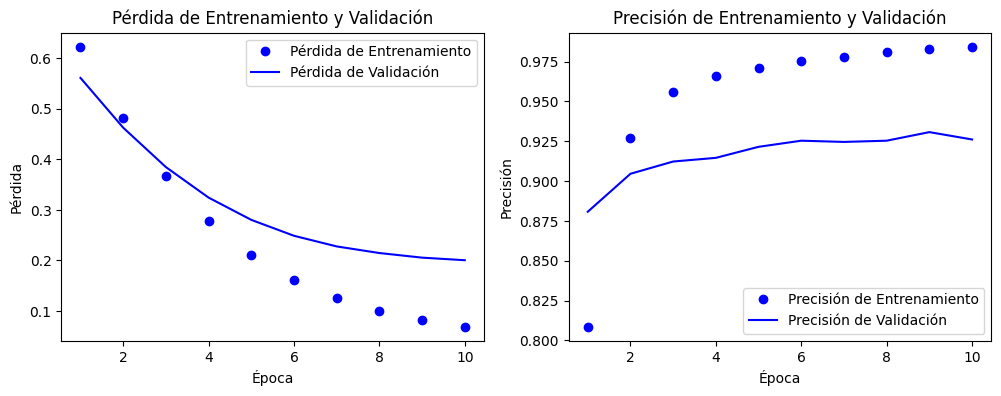

In [42]:
import matplotlib.pyplot as plt

# Extraemos los datos del historial de entrenamiento y validación
loss = history_dict['loss']
acc = history_dict['acc']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

# Graficamos de la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficamos de la precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()


> ### Modelo final

In [43]:
from keras import models
from keras import layers

# Nos aseguramos de que el tamaño de entrada coincida con tus datos vectorizados
input_dimension = x_tweets.shape[1]  # Cambiamos según tus datos

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(input_dimension,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo con tus datos
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=128)

# Evaluación con el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Pérdida con los datos de test:", test_loss)
print("Precisión con los datos de test:", test_acc)

# Realizamos predicciones con el conjunto de test
predictions = model.predict(x_val)


Epoch 1/4
72/72 [==============================] - 2s 14ms/step - loss: 0.5886 - accuracy: 0.8390
Epoch 2/4
72/72 [==============================] - 1s 14ms/step - loss: 0.3031 - accuracy: 0.9553
Epoch 3/4
72/72 [==============================] - 1s 14ms/step - loss: 0.1311 - accuracy: 0.9748
Epoch 4/4
82/82 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.9350
Pérdida con los datos de test: 0.1799030750989914
Precisión con los datos de test: 0.9350000023841858
41/41 [==============================] - 0s 4ms/step


#Bibliografía

1. Saad, M. (n.d.). Arabic Sentiment Twitter Corpus. Kaggle. Recuperado de https://www.kaggle.com/datasets/mksaad/arabic-sentiment-twitter-corpus?select=test_Arabic_tweets_positive_20190413.tsv

2. OpenAI. (n.d.). Chat. Recuperado de https://chat.openai.com/c/af6e1460-6d14-430d-9a84-f7be4dd0193a

3. Loey, M. (n.d.). Arabic Handwritten Characters Dataset. Kaggle. Recuperado de https://www.kaggle.com/datasets/mloey1/ahcd1

4. Bbloggsbott. (n.d.). Understanding Convolutional Neural Network. Kaggle. Recuperado de https://www.kaggle.com/code/bbloggsbott/understanding-convolutional-neural-network

5. Valdera, L. (n.d.). Clasificación binaria críticas películas. GitHub. Recuperado de https://github.com/Luciavaldera/APRENDIZAJE_AUTOMATICO_23_24/blob/main/TEMA%201/3_1_Clasificacion_binaria_criticas_peliculas.ipynb

6. Valdera, L. (n.d.). Redes Neuronales Convolucionales. GitHub. Recuperado de https://github.com/Luciavaldera/APRENDIZAJE_AUTOMATICO_23_24/blob/main/TEMA%201/3_5_Redes_Neuronales_Convolucionales.ipynb

7. InfuseAI. (n.d.). Colab xterm README. GitHub. Recuperado de https://github.com/InfuseAI/colab-xterm/blob/main/README.md

8. Residentmario. (n.d.). Automated feature selection with sklearn. Kaggle. Recuperado de https://www.kaggle.com/code/residentmario/automated-feature-selection-with-sklearn

9. [Sin autor]. (2020, 29 de mayo). TensorFlow 2.0 Tutorial - Convolutional Neural Networks (CNN). [Vídeo]. YouTube. Recuperado de https://www.youtube.com/watch?v=yDLV1Iu0afs

10. Ringa Tech. (n.d.). Youtube tensorflow mnist. GitHub. Recuperado de https://github.com/ringa-tech/youtube-tensorflow-mnist/blob/master/numeros.py

11. http://hdl.handle.net/10045/61454